In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
from scipy import stats
import sklearn as SKLearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [6]:
os.chdir('C:\\Users\\rafal\\Desktop\\dane do licencjatu')
data = pd.read_csv('danelic.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,crosses_gkm,crosses_stopped_gkm,crosses_stopped_pct_gkm,def_actions_outside_pen_area_gkm,def_actions_outside_pen_area_per90_gkm,avg_distance_def_actions_gkm,Season,Column1,Unnamed: 0,season
7383,NaN,Aaron Connolly,ie IRL,FW,Brighton,20.0,2000.0,7000000.0,175.0,attack - Centre-Forward,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,470.0,NaN,202021#
530,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,0.0,0.0,0.0,0.0,0.0,0.0,201920#,NaN,NaN,NaN
7412,NaN,Aaron Cresswell,eng ENG,DF,West Ham,31.0,1989.0,6500000.0,170.0,Defender - Left-Back,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,505.0,NaN,202021#
5228,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,0.0,0.0,0.0,0.0,0.0,0.0,201718#,NaN,574.0,NaN
3090,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,0.0,0.0,0.0,0.0,0.0,0.0,201819#,542.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,202021#
9231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,202021#
9232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,202021#
9233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,202021#


In [3]:
#defining notation for further plots
def scientificNotation(value):
    if value == 0:
        return '0'
    else:
        e = np.log10(np.abs(value))
        m = np.sign(value) * 10 ** (e - int(e))
        return r'${:.0f} \cdot 10^{{{:d}}}$'.format(m, int(e))
#value used for later visualization
def absolute_value(val):
    a  = np.round(val/100.*legs['Amount'].sum(), 0)
    return a

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def ln(x):
    return np.log(x) + 1.

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
def chow_test(results):
    ((result.resid)**2).sum()


In [4]:
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

Text(0, 0.5, 'Count')

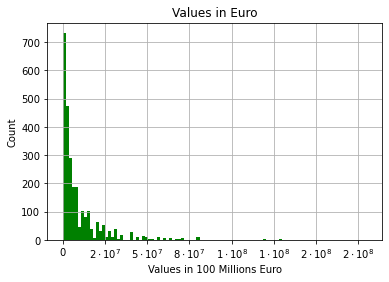

In [178]:
#printing values
values=data["value"]
values=values.astype(np.int64)
values.hist(bins=100, rwidth=2, color='g')
formatter = mpl.ticker.FuncFormatter(lambda x, p: scientificNotation(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Values in Euro')
plt.xlabel('Values in 100 Millions Euro')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

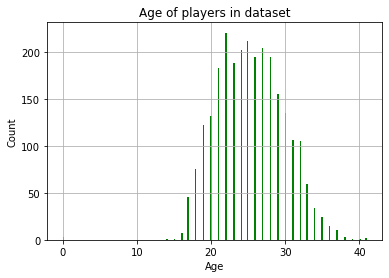

In [179]:
#printing age
age=data["age"]
age.hist(bins=200, rwidth=2, color='g')
plt.title('Age of players in dataset')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

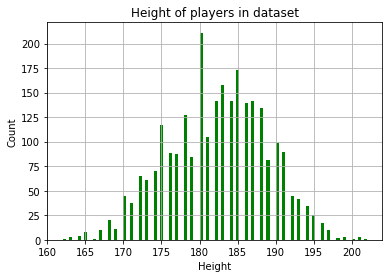

In [180]:
#printing height
height=data["height"]
height=height.astype(np.int64)
height=height[height!=0]
height.hist(bins=100, rwidth=2, color='g')
plt.title('Height of players in dataset')
plt.xlabel('Height')
plt.ylabel('Count')

In [181]:
#printing means
avgvalue=statistics.mean(values)
avgage=statistics.mean(age)
avgheight=statistics.mean(height)
print(avgvalue,avgage,avgheight)


9570623.373676248 25.31694402420575 182.28321943811693


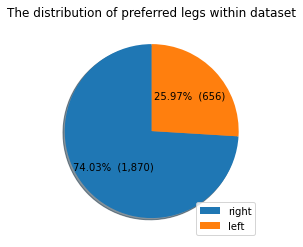

In [182]:
#getting some more info about dataset before going into positions
#legs within dataset
dataRightLeg = data[data['foot']=='right']
dataLeftLeg = data[data['foot']=='left']
rightleg=len(dataRightLeg)
leftleg=len(dataLeftLeg)
legs=pd.DataFrame([rightleg,leftleg])
legs.columns=['Amount']
legs.index=['right','left']
plt.pie(legs['Amount'],autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(legs['Amount'])/100),
    shadow=True, startangle=90)
plt.title('The distribution of preferred legs within dataset')
plt.legend(labels=legs.index,loc="lower right")

Text(0, 0.5, 'Nations')

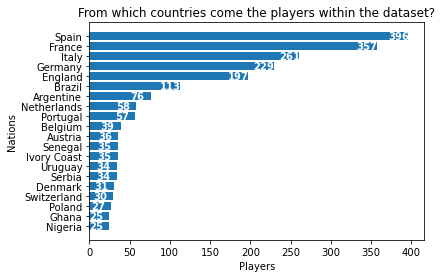

In [183]:
#nations within dataset
#including double passports
datanations=data.groupby('nationality').count()
datanations=datanations['Column1']
datanations=datanations.sort_values(ascending=False)
datanations=datanations[0:20]
datanations=datanations.sort_values(ascending=True)
datanations=pd.DataFrame(datanations)
ytest1=datanations['Column1']
xtest1=datanations.index
xtest1=['Nigeria','Ghana','Poland','Switzerland','Denmark','Serbia','Uruguay','Ivory Coast','Senegal','Austria',
        'Belgium','Portugal','Netherlands','Argentine','Brazil','England','Germany','Italy','France','Spain']
plt.barh(xtest1,ytest1)
for i, v in enumerate(ytest1):
    plt.text(v-25, i-0.3, str(v), color='white', fontweight='bold')
plt.title('From which countries come the players within the dataset?')
plt.xlabel('Players')
plt.ylabel('Nations')

Text(0, 0.5, 'Leagues')

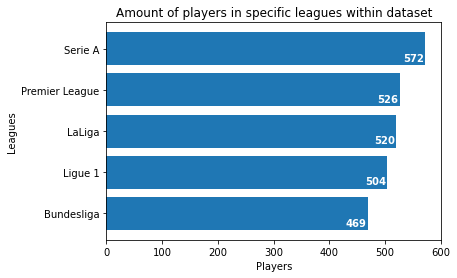

In [184]:
#leagues within dataset
dataleagues=data.groupby('league').count()
dataleagues=dataleagues['Column1']
dataleagues=dataleagues.sort_values(ascending=False)
dataleagues=dataleagues[0:5]
dataleagues=dataleagues.sort_values(ascending=True)
dataleagues=pd.DataFrame(dataleagues)
ytest2=dataleagues['Column1']
xtest2=dataleagues.index
plt.barh(xtest2,ytest2)
for i, v in enumerate(ytest2):
    plt.text(v-40, i-0.3, str(v), color='white', fontweight='bold')
plt.title('Amount of players in specific leagues within dataset')
plt.xlabel('Players')
plt.ylabel('Leagues')

Text(0, 0.5, 'Nations')

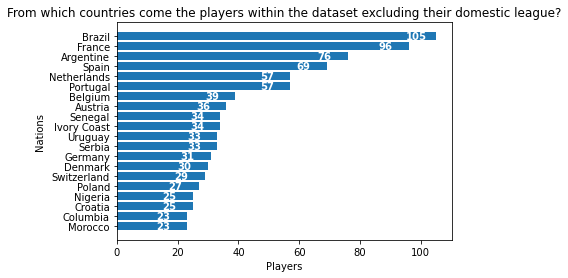

In [185]:
dataLaLiga=data[data['league']=='LaLiga']
dataPremierLeague=data[data['league']=='Premier League']
dataSerieA=data[data['league']=='Serie A']
dataLigue1=data[data['league']=='Ligue 1']
dataBundesliga=data[data['league']=='Bundesliga']
dataLaLiga=dataLaLiga[dataLaLiga['nationality']!='es ESP']
dataPremierLeague=dataPremierLeague[dataPremierLeague['nationality']!='eng ENG']
dataSerieA=dataSerieA[dataSerieA['nationality']!='it ITA']
dataLigue1=dataLigue1[dataLigue1['nationality']!='fr FRA']
dataBundesliga=dataBundesliga[dataBundesliga['nationality']!='de GER']
dataleaguesnations=dataLaLiga.append([dataPremierLeague,dataSerieA,dataLigue1,dataBundesliga])
datanations1=dataleaguesnations.groupby('nationality').count()
datanations1=datanations1['Column1']
datanations1=datanations1.sort_values(ascending=False)
datanations1=datanations1[0:20]
datanations1=datanations1.sort_values(ascending=True)
datanations1=pd.DataFrame(datanations1)
ytest3=datanations1['Column1']
xtest3=datanations1.index
xtest3=['Morocco','Columbia','Croatia','Nigeria','Poland','Switzerland','Denmark','Germany','Serbia','Uruguay','Ivory Coast','Senegal','Austria',
        'Belgium','Portugal','Netherlands','Spain','Argentine','France','Brazil']
plt.barh(xtest3,ytest3)
for i, v in enumerate(ytest3):
    plt.text(v-10, i-0.3, str(v), color='white', fontweight='bold')
plt.title('From which countries come the players within the dataset excluding their domestic league?')
plt.xlabel('Players')
plt.ylabel('Nations')

In [35]:
#dividing players by their positions
dataGK = data[data['position2']=='Goalkeeper']
dataGK

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
10,12,Antonio AdĂˇn,es ESP,GK,AtlĂ©tico Madrid,31,1987,1500000,190.0,Goalkeeper,...,40.9,10,80.0,55.4,9,0,0.0,0,0.00,15.3
46,57,RĂşnar Alex RĂşnarsson,is ISL,GK,Dijon,23,1995,3000000,186.0,Goalkeeper,...,37.8,203,75.4,56.3,201,17,8.5,19,0.76,15.4
49,61,Alisson,br BRA,GK,Liverpool,25,1992,80000000,191.0,Goalkeeper,...,32.4,208,52.4,46.3,278,22,7.9,37,0.97,16.6
50,62,Bobby Allain,fr FRA,GK,Dijon,26,1991,800000,185.0,Goalkeeper,...,44.9,126,82.5,57.7,143,24,16.8,11,0.85,15.8
58,70,Sergio Ă�lvarez,es ESP,GK,Celta Vigo,31,1986,2000000,179.0,Goalkeeper,...,40.3,124,74.2,55.1,146,10,6.8,4,0.31,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2548,Michel Vorm,nl NED,GK,Tottenham,34,1983,1000000,183.0,Goalkeeper,...,26.2,8,50.0,42.3,15,1,6.7,1,0.50,12.9
2033,2568,Danny Ward,eng ENG,FW,Cardiff City,26,1991,8000000,191.0,Goalkeeper,...,0.0,0,0.0,0.0,0,0,0.0,0,0.00,0.0
2045,2580,Axel Werner,ar ARG,GK,Huesca,22,1996,600000,192.0,Goalkeeper,...,47.2,58,87.9,63.1,57,1,1.8,0,0.00,9.5
2085,2637,Robin Zentner,de GER,GK,Mainz 05,23,1994,1000000,195.0,Goalkeeper,...,39.3,91,81.3,63.0,111,15,13.5,8,0.80,14.7


In [36]:
dataDEF = data[data['position2'].str[:8]=='Defender']
dataDEF

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,27,1990,10000000,176.0,Defender - Left-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
1,2,Ignazio Abate,it ITA,DF,Milan,31,1986,2000000,180.0,Defender - Right-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,30,1987,2500000,190.0,Defender - Centre-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
5,7,David Abraham,ar ARG,DF,Eint Frankfurt,32,1986,2500000,188.0,Defender - Centre-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
7,9,Francesco Acerbi,it ITA,DF,Lazio,30,1988,12000000,192.0,Defender - Centre-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2633,Mehdi Zeffane,dz ALG,DF,Rennes,26,1992,2000000,176.0,Defender - Right-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2088,2642,Jean Zimmer,de GER,"DF,MF",DĂĽsseldorf,24,1993,2750000,172.0,Defender - Right-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2089,2643,Matthias Zimmermann,de GER,"DF,MF",DĂĽsseldorf,26,1992,5000000,177.0,Defender - Right-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2090,2644,Oleksandr Zinchenko,ua UKR,DF,Manchester City,21,1996,20000000,175.0,Defender - Left-Back,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0


In [37]:
dataMID = data[data['position2'].str[:10]=='Midfielder']
dataMID

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
3,5,Mehdi Abeid,dz ALG,MF,Dijon,25,1992,1750000,178.0,Midfielder - Central Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
6,8,Amir Abrashi,al ALB,MF,Freiburg,28,1990,2500000,172.0,Midfielder - Defensive Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
8,10,Afriyie Acquah,gh GHA,MF,Empoli,26,1992,1800000,179.0,Midfielder - Central Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
9,11,Tyler Adams,us USA,MF,RB Leipzig,19,1999,13000000,176.0,Midfielder - Defensive Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
14,16,Yacine Adli,fr FRA,"MF,FW",Bordeaux,18,2000,5500000,186.0,Midfielder - Attacking Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2650,Steven Zuber,ch SUI,"MF,FW",Hoffenheim,26,1991,7000000,182.0,Midfielder - Left Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2096,2651,Steven Zuber,ch SUI,"FW,MF",Stuttgart,26,1991,7000000,182.0,Midfielder - Left Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2097,2652,MartĂ­n Zubimendi,es ESP,MF,Real Sociedad,19,1999,100000,180.0,Midfielder - Central Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2098,2654,Bongani Zungu,za RSA,MF,Amiens,25,1992,2500000,184.0,Midfielder - Central Midfield,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0


In [38]:
dataFWD = data[data['position2'].str[:7]=='Forward']
dataFWD

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
4,6,Charles Abi,fr FRA,"FW,MF",Saint-Ă‰tienne,18,2000,500000,187.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
15,18,Aritz Aduriz,es ESP,FW,Athletic Club,37,1981,1000000,181.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
18,22,Sergio AgĂĽero,ar ARG,FW,Manchester City,30,1988,65000000,173.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
26,32,Ludovic Ajorque,re REU,FW,Strasbourg,24,1994,4000000,197.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
35,42,Lucas Alario,ar ARG,FW,Leverkusen,25,1992,17000000,185.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,2629,DuvĂˇn Zapata,co COL,FW,Atalanta,27,1991,40000000,189.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2081,2631,Simone Zaza,it ITA,FW,Torino,27,1991,10000000,186.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2086,2638,Nabil El Zhar,ma MAR,"MF,FW",LeganĂ©s,31,1986,2000000,170.0,Forward - Right Winger,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0
2091,2645,KĂ©vin Zohi,ml MLI,"FW,MF",Strasbourg,21,1996,2000000,177.0,Forward - Centre-Forward,...,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0


Text(0, 0.5, 'Count')

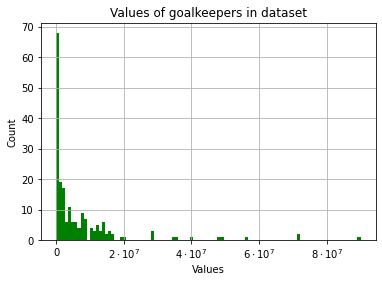

In [190]:
#GKs basic info
#printing values
GKvalues=dataGK["value"]
GKvalues=GKvalues.astype(np.int64)
GKvalues.hist(bins=100, rwidth=2, color='g')
plt.title('Values of goalkeepers in dataset')
formatter = mpl.ticker.FuncFormatter(lambda x, p: scientificNotation(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Values')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

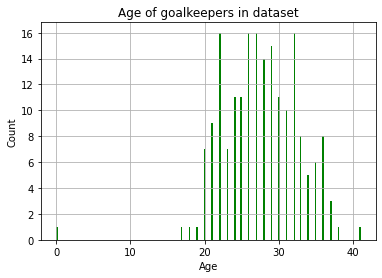

In [191]:
#printing age
GKage=dataGK["age"]
GKage.hist(bins=200, rwidth=2, color='g')
plt.title('Age of goalkeepers in dataset')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

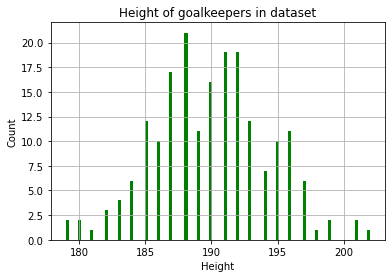

In [192]:
#printing height
GKheight=dataGK["height"]
GKheight=GKheight.astype(np.int64)
GKheight=GKheight[GKheight!=0]
GKheight.hist(bins=100, rwidth=2, color='g')
plt.title('Height of goalkeepers in dataset')
plt.xlabel('Height')
plt.ylabel('Count')


In [193]:
#printing means
avgGKvalue=statistics.mean(GKvalues)
avgGKage=statistics.mean(GKage)
avgGKheight=statistics.mean(GKheight)
print(avgGKvalue,avgGKage,avgGKheight)

6860880 27.61025641025641 189.97948717948717


Text(0, 0.5, 'Count')

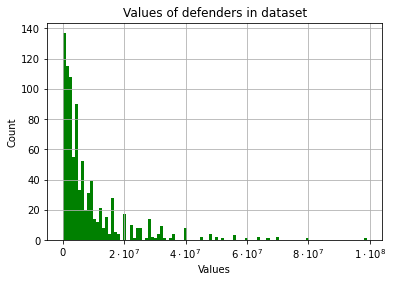

In [194]:
#DEFs basic info
#printing values
DEFvalues=dataDEF["value"]
DEFvalues.hist(bins=100, rwidth=2, color='g')
plt.title('Values of defenders in dataset')
formatter = mpl.ticker.FuncFormatter(lambda x, p: scientificNotation(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Values')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

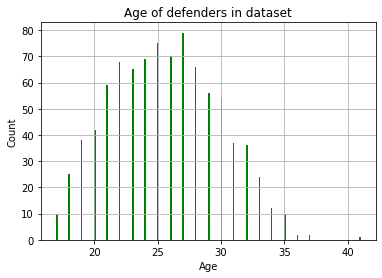

In [195]:
#printing age
DEFage=dataDEF["age"]
DEFage.hist(bins=200, rwidth=2, color='g')
plt.title('Age of defenders in dataset')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

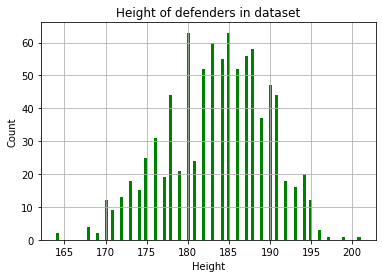

In [196]:
#printing height
DEFheight=dataDEF["height"]
DEFheight=DEFheight.astype(np.int64)
DEFheight=DEFheight[DEFheight!=0]
DEFheight.hist(bins=100, rwidth=2, color='g')
plt.title('Height of defenders in dataset')
plt.xlabel('Height')
plt.ylabel('Count')


In [197]:
#printing means
avgDEFvalue=statistics.mean(DEFvalues)
avgDEFage=statistics.mean(DEFage)
avgDEFheight=statistics.mean(DEFheight)
print(avgDEFvalue,avgDEFage,avgDEFheight)

8003171.083333333 25.58222222222222 183.61804008908686


Text(0, 0.5, 'Count')

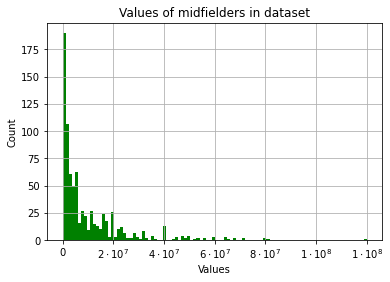

In [198]:
#MIDs basic info
#printing values
MIDvalues=dataMID["value"]
MIDvalues.hist(bins=100, rwidth=2, color='g')
plt.title('Values of midfielders in dataset')
formatter = mpl.ticker.FuncFormatter(lambda x, p: scientificNotation(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Values')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

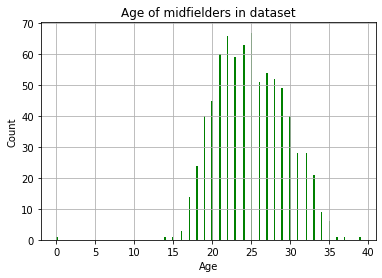

In [199]:
#printing age
MIDage=dataMID["age"]
MIDage.hist(bins=200, rwidth=2, color='g')
plt.title('Age of midfielders in dataset')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

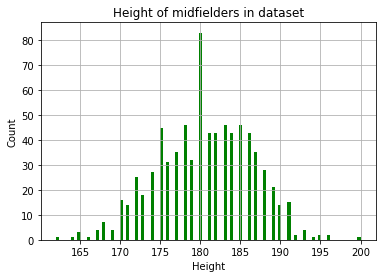

In [200]:
#printing height
MIDheight=dataMID["height"]
MIDheight=MIDheight.astype(np.int64)
MIDheight=MIDheight[MIDheight!=0]
MIDheight.hist(bins=100, rwidth=2, color='g')
plt.title('Height of midfielders in dataset')
plt.xlabel('Height')
plt.ylabel('Count')

In [201]:
#printing means
avgMIDvalue=statistics.mean(MIDvalues)
avgMIDage=statistics.mean(MIDage)
avgMIDheight=statistics.mean(MIDheight)
print(avgMIDvalue,avgMIDage,avgMIDheight)


10042878.216560509 24.979617834394904 180.55882352941177


Text(0, 0.5, 'Count')

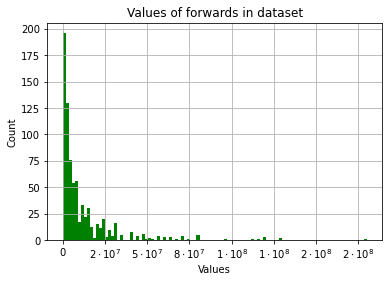

In [202]:
#FWDs basic info
#printing values
FWDvalues=dataFWD["value"]
FWDvalues.hist(bins=100, rwidth=2, color='g')
plt.title('Values of forwards in dataset')
formatter = mpl.ticker.FuncFormatter(lambda x, p: scientificNotation(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Values')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

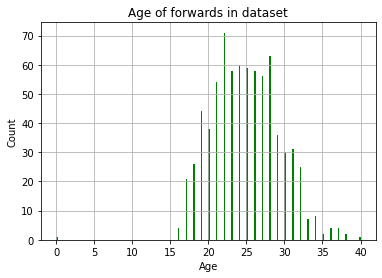

In [203]:
#printing age
FWDage=dataFWD["age"]
FWDage.hist(bins=200, rwidth=2, color='g')
plt.title('Age of forwards in dataset')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

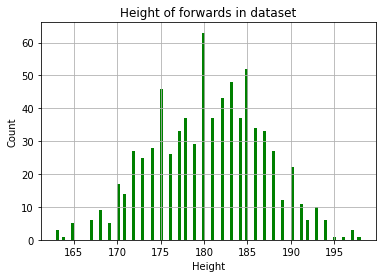

In [204]:
#printing height
FWDheight=dataFWD["height"]
FWDheight=FWDheight.astype(np.int64)
FWDheight=FWDheight[FWDheight!=0]
FWDheight.hist(bins=100, rwidth=2, color='g')
plt.title('Height of forwards in dataset')
plt.xlabel('Height')
plt.ylabel('Count')


In [205]:
#printing means
avgFWDvalue=statistics.mean(FWDvalues)
avgFWDage=statistics.mean(FWDage)
avgFWDheight=statistics.mean(FWDheight)
print(avgFWDvalue,avgFWDage,avgFWDheight)

11603333.191349935 24.770642201834864 180.51055408970976


In [206]:
#an overview
vectorGK=np.array([avgGKvalue,avgGKage,avgGKheight])
vectorDEF=np.array([avgDEFvalue,avgDEFage,avgDEFheight])
vectorMID=np.array([avgMIDvalue,avgMIDage,avgMIDheight])
vectorFWD=np.array([avgFWDvalue,avgFWDage,avgFWDheight])
overviewforpositions=pd.DataFrame([vectorGK,vectorDEF,vectorMID,vectorFWD])
overviewforpositions.columns=['value','age','height']
overviewforpositions.index=['Goalkeepers','Defenders','Midfielders','Forwards']
overviewforpositions

,value,age,height
Goalkeepers,6.860880e+06,27.610256,189.979487
Defenders,8.003171e+06,25.582222,183.618040
Midfielders,1.004288e+07,24.979618,180.558824
Forwards,1.160333e+07,24.770642,180.510554


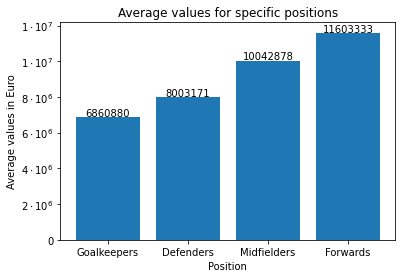

In [207]:
#at this time - only values
xtest = overviewforpositions.index
ytest = overviewforpositions["value"]
plt.bar(xtest,ytest)
plt.title('Average values for specific positions')
formatter = mpl.ticker.FuncFormatter(lambda y, p: scientificNotation(y))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Position')
plt.ylabel('Average values in Euro')
for x,y in zip(xtest,ytest):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')

In [208]:
#Plan działania (faza wstępna):
#1. Pokombinować jeszcze nad opcjonalną wizualizacją co do wartości piłkarzy (zbadać w zależności od ligi, wieku, wzrostu, narodowości)
#zrobione
#2. Zacząć opracowywać modele regresji liniowej dla każdej z pozycji
#Zrobione
#3. Wyodrębnić obserwacje dla danych pozycji (20%) pod prognozy i zacząć tworzyć modele w Scikitlearn, spróbować z siecią neuronową
#W trakcie
#4. Przetestować modele metodami ekonometrycznymi oraz zweryfikować poprzez prognozę
#Zrobione
#5. Utworzyć modele ML
#W trakcie
#6. Wizualizacja danych końcowych
#7. Porównanie z realnymi wycenami Transfermarktu, bądź wybranych transferów
#8. poprawki

Text(27.0, 0.5, 'Value in 100 millions euro')

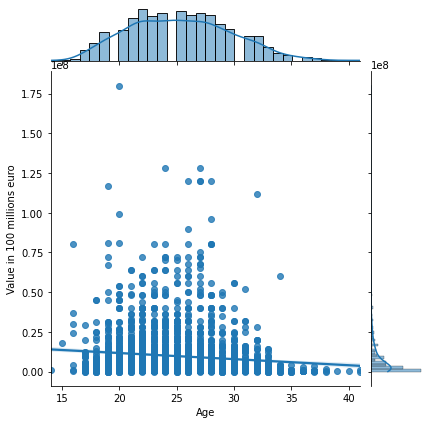

In [209]:
dataagevalue=data[data["age"]!=0]
sns.jointplot(x="age",y="value",data=dataagevalue,kind="reg")
plt.xlabel('Age')
plt.ylabel('Value in 100 millions euro')

Text(27.0, 0.5, 'Value in 100 millions euro')

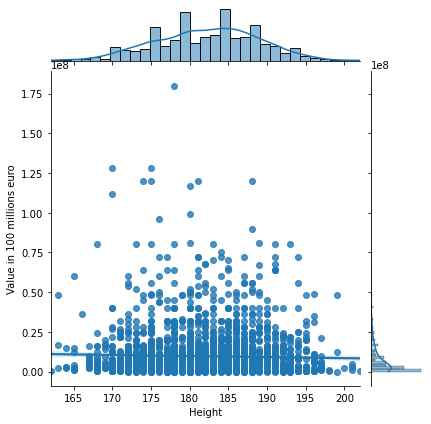

In [210]:
dataheightvalue=data[data["height"]!=0]
sns.jointplot(x="height",y="value",data=dataheightvalue,kind="reg")
plt.xlabel('Height')
plt.ylabel('Value in 100 millions euro')

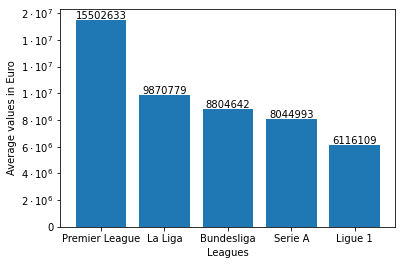

In [211]:
dataLaLiga=data[data['league']=='LaLiga']
dataPremierLeague=data[data['league']=='Premier League']
dataSerieA=data[data['league']=='Serie A']
dataLigue1=data[data['league']=='Ligue 1']
dataBundesliga=data[data['league']=='Bundesliga']
valueBundesliga=statistics.mean(dataBundesliga['value'])
valueLaLiga=statistics.mean(dataLaLiga['value'])
valuePremierLeague=statistics.mean(dataPremierLeague['value'])
valueLigue1=statistics.mean(dataLigue1['value'])
valueSerieA=statistics.mean(dataSerieA['value'])
ligi=['Premier League','La Liga','Bundesliga','Serie A','Ligue 1']
valuesleagues=[valuePremierLeague, valueLaLiga, valueBundesliga, valueSerieA, valueLigue1]
plt.bar(ligi,valuesleagues)
formatter = mpl.ticker.FuncFormatter(lambda y, p: scientificNotation(y))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Leagues')
plt.ylabel('Average values in Euro')
for x,y in zip(ligi,valuesleagues):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')

(13733779, 19496588, 16876129, 14312500, 19203500, 16192226, 13293651, 12228761, 15396052, 19833589, 10230866)


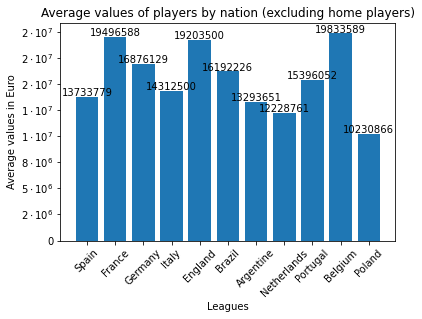

In [248]:
dataSpain=dataleaguesnations[dataleaguesnations['nationality']=='es ESP']
dataFrance=dataleaguesnations[dataleaguesnations['nationality']=='fr FRA']
dataGermany=dataleaguesnations[dataleaguesnations['nationality']=='de GER']
dataItaly=dataleaguesnations[dataleaguesnations['nationality']=='it ITA']
dataEngland=dataleaguesnations[dataleaguesnations['nationality']=='eng ENG']
dataBrazil=data[data['nationality']=='br BRA']
dataArgentine=data[data['nationality']=='ar ARG']
dataNetherlands=data[data['nationality']=='nl NED']
dataPortugal=data[data['nationality']=='pt POR']
dataBelgium=data[data['nationality']=='be BEL']
dataPoland=data[data['nationality']=='pl POL']
valueSpain=int(statistics.mean(dataSpain['value']))
valueFrance=int(statistics.mean(dataFrance['value']))
valueGermany=int(statistics.mean(dataGermany['value']))
valueItaly=int(statistics.mean(dataItaly['value']))
valueEngland=int(statistics.mean(dataEngland['value']))
valueBrazil=int(statistics.mean(dataBrazil['value']))
valueArgentine=int(statistics.mean(dataArgentine['value']))
valueNetherlands=int(statistics.mean(dataNetherlands['value']))
valuePortugal=int(statistics.mean(dataPortugal['value']))
valueBelgium=int(statistics.mean(dataBelgium['value']))
valuePoland=int(statistics.mean(dataPoland['value']))
kraje=['Spain','France','Germany','Italy','England','Brazil','Argentine','Netherlands','Portugal','Belgium','Poland']
valuesnations=(valueSpain,valueFrance,valueGermany,valueItaly,valueEngland,valueBrazil,valueArgentine,valueNetherlands,valuePortugal,valueBelgium,valuePoland)
print(valuesnations)
plt.bar(kraje,valuesnations)
formatter = mpl.ticker.FuncFormatter(lambda y, p: scientificNotation(y))
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Average values of players by nation (excluding home players)')
plt.xlabel('Leagues')
plt.ylabel('Average values in Euro')
plt.xticks(rotation=45)
for x,y in zip(kraje,valuesnations):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')

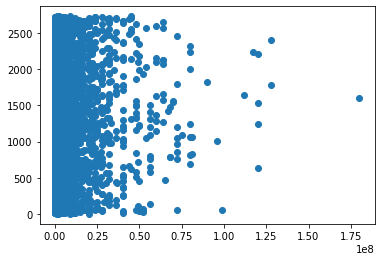

In [49]:
#more insights about values
np.log(data['value'])
plt.scatter(data['value'],data['ď»żColumn1'])

In [121]:
#jarquebera
jbtest1=sm.stats.stattools.jarque_bera(data['value'])
jbtest2=sm.stats.stattools.jarque_bera(np.log(data['value']))
jbtest1, jbtest2
#brak rozkladu normalnego


((4073.668644539247, 0.0, 2.499528616979224, 10.781116646294763),
 (46.26130695325269,
  9.005023121990222e-11,
  0.33807481771573344,
  2.282931177800176))

In [15]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])

In [16]:
#data modelling
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
goals_m=np.array(data1['goals']/data1['minutes'])
data1['goals_m']=goals_m
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLaLiga,league_LaLiga,league_Liga NOS,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,goals_m
0,0.0,Patrick van Aanholt,nl NED,DF,Crystal Palace,28,1990,9000000,176.0,Defender - Left-Back,...,0,0,0,0,1,0,0,0,1,0.001197
1,1.0,Max Aarons,eng ENG,DF,Norwich City,19,2000,20000000,178.0,Defender - Right-Back,...,0,0,0,0,1,0,0,0,1,0.000000
2,2.0,Yunis Abdelhamid,ma MAR,DF,Reims,31,1987,2000000,190.0,Defender - Centre-Back,...,0,0,0,1,0,0,0,0,1,0.001190
4,4.0,Mehdi Abeid,dz ALG,MF,Nantes,26,1992,2000000,178.0,Midfielder - Central Midfield,...,0,0,0,1,0,0,0,0,1,0.000550
7,7.0,Tammy Abraham,eng ENG,FW,Chelsea,21,1997,40000000,191.0,Forward - Centre-Forward,...,0,0,0,0,1,0,0,0,1,0.006772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,NaN,Igor Zubeldia,es ESP,MF,Real Sociedad,20,1997,5000000,180.0,midfield - Defensive Midfield,...,0,1,0,0,0,0,1,0,0,0.000629
6970,NaN,Steven Zuber,ch SUI,"DF,MF",Hoffenheim,25,1991,7000000,182.0,midfield - Left Midfield,...,0,0,0,0,0,0,1,0,0,0.000699
6971,NaN,Bruno Zuculini,ar ARG,MF,Hellas Verona,24,1993,2500000,182.0,midfield - Defensive Midfield,...,0,0,0,0,0,1,1,0,0,0.001645
6973,NaN,Bongani Zungu,za RSA,MF,Amiens,24,1992,3500000,184.0,midfield - Central Midfield,...,0,0,0,1,0,0,1,0,0,0.000480


In [17]:
#2 #3
#evaluating which variables are significant using StatsModels 
dataGK = data1[data1['position2']=='Goalkeeper']
resultsGKtest=smf.ols('value~age+ln(height)+minutes+clean_sheets_pct+psxg_gk+save_pct+'
                  'psnpxg_per_shot_on_target_against+psxg_net_per90_gk+passes_pct_launched_gk+passes_throws_gk+'
                  'passes_length_avg_gk+pct_goal_kicks_launched+crosses_stopped_pct_gk+avg_distance_def_actions_gk+'
                  'def_actions_outside_pen_area_per90_gk+isPremierLeague',data=dataGK).fit()
print(resultsGKtest.summary())
resultsGKcompare=smf.ols('np.log(value)~age+minutes+psxg_gk+save_pct+goals_against_per90_gk+save_pct+psnpxg_per_shot_on_target_against',data=dataGK).fit()
resultsGKcompare.summary()
#ważne zmienne - age, minutes, clean_sheets_pct, psxg_gk, save_pct, passes_pct_launched_gk, pct_goal_kicks_launched
#crosses_stopped_pct_gk

PatsyError: Error evaluating factor: NameError: name 'ln' is not defined
    value~age+ln(height)+minutes+clean_sheets_pct+psxg_gk+save_pct+psnpxg_per_shot_on_target_against+psxg_net_per90_gk+passes_pct_launched_gk+passes_throws_gk+passes_length_avg_gk+pct_goal_kicks_launched+crosses_stopped_pct_gk+avg_distance_def_actions_gk+def_actions_outside_pen_area_per90_gk+isPremierLeague
              ^^^^^^^^^^

In [20]:
dataDEF = data1[data1['position2'].str[:8]=='Defender']
resultsDEFtest=smf.ols('np.log(value)~height+age+foot+minutes+goals+assists+pens_made+pens_att+cards_yellow+cards_red+goals_per90+assists_per90+goals_assists_per90+goals_pens_per90+goals_assists_pens_per90+xg+npxg+xa+xg_per90+xa_per90+xg_xa_per90+npxg_per90+npxg_xa_per90+minutes_90s+shots_total+shots_on_target+shots_free_kicks+shots_on_target_pct+shots_total_per90+shots_on_target_per90+goals_per_shot+goals_per_shot_on_target+npxg_per_shot+xg_net+npxg_net+passes_completed+passes+passes_pct+passes_total_distance+passes_progressive_distance+passes_completed_short+passes_short+passes_pct_short+passes_completed_medium+passes_medium+passes_pct_medium+passes_completed_long+passes_long+passes_pct_long+xa_net+assisted_shots+passes_into_final_third+passes_into_penalty_area+crosses_into_penalty_area+progressive_passes+passes_live+passes_dead+passes_free_kicks+through_balls+passes_pressure+passes_switches+crosses+corner_kicks+corner_kicks_in+corner_kicks_out+corner_kicks_straight+passes_ground+passes_low+passes_high+passes_left_foot+passes_right_foot+passes_head+throw_ins+passes_other_body+passes_offsides+passes_oob+passes_intercepted+passes_blocked+sca+sca_per90+sca_passes_live+sca_passes_dead+sca_dribbles+sca_shots+sca_fouled+gca+gca_per90+gca_passes_live+gca_passes_dead+gca_dribbles+gca_shots+gca_fouled+gca_og_for+tackles+tackles_won+tackles_def_3rd+tackles_mid_3rd+tackles_att_3rd+dribble_tackles+dribbles_vs+dribble_tackles_pct+dribbled_past+pressures+pressure_regains+pressure_regain_pct+pressures_def_3rd+pressures_mid_3rd+pressures_att_3rd+blocks+blocked_shots+blocked_shots_saves+blocked_passes+interceptions+clearances+errors+touches+touches_def_pen_area+touches_def_3rd+touches_mid_3rd+touches_att_3rd+touches_att_pen_area+touches_live_ball+dribbles_completed+dribbles+dribbles_completed_pct+players_dribbled_past+nutmegs+carries+carry_distance+carry_progressive_distance+pass_targets+passes_received+passes_received_pct+miscontrols+dispossessed+cards_yellow_red+fouls+fouled+offsides+pens_won+pens_conceded+own_goals+ball_recoveries+aerials_won+aerials_lost+aerials_won_pct',data=dataDEF).fit()
resultsDEFtest.summary()
#ważne zmienne:
#foot, age, xa, xg_per90, xg_xa_per90, npxg_xa_per90, goals_per_shot, xg_net, goals_per_shot_on_target, xa_net, passes_into_penalty_area
#passes_ground, passes_oob, gca_og_for, gca_shots, gca_passes_dead, pressure_regains, pressure_regain_pct
#pressures_mid_3rd, blocked_shots, errors, touches_def_pen_area, touches_att_pen_area, dribbles, #carries, #carry_distance
#pens_won, pens_conceded, aerials_won_pct, passes_total_distance, passes_offsides, tackles_att_3rd, miscontrols
#cards_yellow, cards_red, passes_pct_short, passes_completed_medium, passes_completed_long, corner_kicks_in, corner_kicks_straight
#carry_progressive_distance, dispossessed, fouled

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(value)   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.23e-185
Time:                        23:55:49   Log-Likelihood:                -1652.0
No. Observations:                1674   AIC:                             3588.
Df Residuals:                    1532   BIC:                             4358.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      14.4701      1.146     12.626      0.000      12.222      16.718
foot[T.left]                    0.2439      0.146      1.670      0.095      -0.043       0.530
foot[T.right]                   0.2134      0.134      1.596      0.111      -0.049       0.476
height                         -0.0003      0.004     -0.068      0.946      -0.009       0.008
age                            -0.0900      0.005    -17.170      0.000      -0.100      -0.080
minutes                        -0.0003      0.000     -0.815      0.415      -0.001       0.000
goals                           0.2855      0.276      1.034      0.301      -0.256       0.827
assists                         0.3250      0.256      1.271      0.204      -0.177       0.827
pens_made                       0.1703      0.575      0.296      0.767      -0.958       1.298
pens_att                       -0.3063      0.780     -0.393      0.695      -1.837       1.224
cards_yellow                   -0.0117      0.009     -1.264      0.207      -0.030       0.006
cards_red                      -0.0891      0.048     -1.864      0.063      -0.183       0.005
goals_per90                   -11.8885     37.730     -0.315      0.753     -85.896      62.119
assists_per90                   9.7513      5.819      1.676      0.094      -1.662      21.165
goals_assists_per90            -0.2352     28.503     -0.008      0.993     -56.144      55.674
goals_pens_per90               22.4985     38.127      0.590      0.555     -52.287      97.284
goals_assists_pens_per90       -9.8858     28.930     -0.342      0.733     -66.632      46.860
xg                              0.0292      0.607      0.048      0.962      -1.162       1.221
npxg                           -0.2776      0.607     -0.458      0.647      -1.467       0.912
xa                             -0.2915      0.267     -1.090      0.276      -0.816       0.233
xg_per90                      -12.6168     22.420     -0.563      0.574     -56.595      31.361
xa_per90                        2.3046      3.609      0.639      0.523      -4.775       9.384
xg_xa_per90                    24.1376     29.006      0.832      0.405     -32.758      81.033
npxg_per90                     13.0990     22.335      0.586      0.558     -30.712      56.910
npxg_xa_per90                 -25.9085     28.979     -0.894      0.371     -82.751      30.934
minutes_90s                     0.0080      0.034      0.236      0.814      -0.059       0.075
shots_total                    -0.0070      0.010     -0.731      0.465      -0.026       0.012
shots_on_target                 0.0067      0.026      0.255      0.798      -0.045       0.058
shots_free_kicks               -0.0058      0.016     -0.364      0.716      -0.037       0.025
shots_on_ta

In [21]:
dataMID = data1[data1['position2'].str[:10]=='Midfielder']
resultsMIDtest=smf.ols('value~height+age+foot+minutes+goals+assists+pens_made+pens_att+cards_yellow+cards_red+goals_per90+assists_per90+goals_assists_per90+goals_pens_per90+goals_assists_pens_per90+xg+npxg+xa+xg_per90+xa_per90+xg_xa_per90+npxg_per90+npxg_xa_per90+minutes_90s+shots_total+shots_on_target+shots_free_kicks+shots_on_target_pct+shots_total_per90+shots_on_target_per90+goals_per_shot+goals_per_shot_on_target+npxg_per_shot+xg_net+npxg_net+passes_completed+passes+passes_pct+passes_total_distance+passes_progressive_distance+passes_completed_short+passes_short+passes_pct_short+passes_completed_medium+passes_medium+passes_pct_medium+passes_completed_long+passes_long+passes_pct_long+xa_net+assisted_shots+passes_into_final_third+passes_into_penalty_area+crosses_into_penalty_area+progressive_passes+passes_live+passes_dead+passes_free_kicks+through_balls+passes_pressure+passes_switches+crosses+corner_kicks+corner_kicks_in+corner_kicks_out+corner_kicks_straight+passes_ground+passes_low+passes_high+passes_left_foot+passes_right_foot+passes_head+throw_ins+passes_other_body+passes_offsides+passes_oob+passes_intercepted+passes_blocked+sca+sca_per90+sca_passes_live+sca_passes_dead+sca_dribbles+sca_shots+sca_fouled+gca+gca_per90+gca_passes_live+gca_passes_dead+gca_dribbles+gca_shots+gca_fouled+gca_og_for+tackles+tackles_won+tackles_def_3rd+tackles_mid_3rd+tackles_att_3rd+dribble_tackles+dribbles_vs+dribble_tackles_pct+dribbled_past+pressures+pressure_regains+pressure_regain_pct+pressures_def_3rd+pressures_mid_3rd+pressures_att_3rd+blocks+blocked_shots+blocked_shots_saves+blocked_passes+interceptions+clearances+errors+touches+touches_def_pen_area+touches_def_3rd+touches_mid_3rd+touches_att_3rd+touches_att_pen_area+touches_live_ball+dribbles_completed+dribbles+dribbles_completed_pct+players_dribbled_past+nutmegs+carries+carry_distance+carry_progressive_distance+pass_targets+passes_received+passes_received_pct+miscontrols+dispossessed+cards_yellow_red+fouls+fouled+offsides+pens_won+pens_conceded+own_goals+ball_recoveries+aerials_won+aerials_lost+aerials_won_pct',data=dataMID).fit()
resultsMIDtest.summary()
#ważne zmienne:
#age, minutes, assists, goals_per90, goals_assists_per90, xa, minutes_90s, shots_on_target_pct, xa_net, passes_into_final_third
#progressive_passes, gca, gca_passes_live, gca_passes_dead, gca_dribbles, gca_fouled, dribbles_vs, pressure_regain_pct
#blocks, touches_mid_3rd, touches_att_3rd, players_dribbled_past, fouls, aerials_lost, balls_recoveries, passes_received
#interceptions, blocked_shots, tackles, passes_blocked, passes_long, passes_completed_medium, shots_free_kicks, xg_per90
#npxg_per90, npxg_xa_per90, passes_into_penalty_area, crosses_into_penalty_area, passes_long, corner_kicks_in, passes_oob
#passes_received_pct, dribbles_completed, tackles_won, passes_blocked, passes_intercepted, corner_kicks_straight, through_balls
#passes_into_final_third, passes_completed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     9.975
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          8.30e-111
Time:                        23:55:52   Log-Likelihood:                -17786.
No. Observations:                1013   AIC:                         3.586e+04
Df Residuals:                     870   BIC:                         3.656e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -4.121e+06   2.02e+07     -0.204      0.838   -4.37e+07    3.54e+07
foot[T.left]                -1.337e+05   2.26e+06     -0.059      0.953   -4.58e+06    4.31e+06
foot[T.right]               -3.713e+06   1.86e+06     -2.000      0.046   -7.36e+06   -7.02e+04
height                       1.296e+05   7.86e+04      1.649      0.100   -2.47e+04    2.84e+05
age                         -1.024e+06   1.14e+05     -8.993      0.000   -1.25e+06   -8.01e+05
minutes                      9741.3163   8492.659      1.147      0.252   -6927.179    2.64e+04
goals                       -3.388e+05   7.62e+06     -0.044      0.965   -1.53e+07    1.46e+07
assists                      2.926e+06   1.95e+06      1.497      0.135    -9.1e+05    6.76e+06
pens_made                   -8.889e+06   7.07e+07     -0.126      0.900   -1.48e+08     1.3e+08
pens_att                    -6.614e+06   1.01e+07     -0.652      0.515   -2.65e+07    1.33e+07
cards_yellow                 2.412e+05    2.1e+05      1.147      0.252   -1.72e+05    6.54e+05
cards_red                   -1.194e+06    1.4e+06     -0.851      0.395   -3.95e+06    1.56e+06
goals_per90                 -7.035e+07   2.46e+08     -0.286      0.775   -5.54e+08    4.13e+08
assists_per90               -7.628e+07   1.01e+08     -0.753      0.452   -2.75e+08    1.23e+08
goals_assists_per90          7.385e+07   2.38e+08      0.311      0.756   -3.92e+08     5.4e+08
goals_pens_per90            -1.038e+07   2.45e+08     -0.042      0.966   -4.91e+08     4.7e+08
goals_assists_pens_per90     -1.09e+07   2.38e+08     -0.046      0.963   -4.78e+08    4.56e+08
xg                           1.793e+07    7.7e+07      0.233      0.816   -1.33e+08    1.69e+08
npxg                        -1.807e+07   7.14e+07     -0.253      0.800   -1.58e+08    1.22e+08
xa                          -3.074e+06   2.15e+06     -1.428      0.154    -7.3e+06    1.15e+06
xg_per90                    -4.997e+08   2.11e+08     -2.369      0.018   -9.14e+08   -8.58e+07
xa_per90                    -8.284e+07   7.99e+07     -1.037      0.300    -2.4e+08     7.4e+07
xg_xa_per90                  5.125e+08   2.27e+08      2.255      0.024    6.65e+07    9.58e+08
npxg_per90                   4.392e+08   2.08e+08      2.116      0.035    3.17e+07    8.47e+08
npxg_xa_per90               -4.137e+08   2.25e+08     -1.842      0.066   -8.55e+08    2.71e+07
minutes_90s                 -1.292e+06   7.44e+05     -1.737      0.083   -2.75e+06    1.68e+05
shots_total                  1.827e+05   1.38e+05      1.324      0.186    -8.8e+04    4.53e+05
shots_on_target              5.807e+05   2.74e+05      2.123      0.034    4.39e+04    1.12e+06
shots_free_kicks             5.932e+04   2.46e+05      0.241      0.810   -4.24e+05    5.43e+05
shots_on_ta

In [22]:
dataFWD = data1[data1['position2'].str[:7]=='Forward']
resultsFWDtest=smf.ols('value~goals_m+height+age+foot+games+goals+assists+pens_made+pens_att+cards_yellow+cards_red+goals_per90+assists_per90+goals_assists_per90+goals_pens_per90+goals_assists_pens_per90+xg+npxg+xa+xg_per90+xa_per90+xg_xa_per90+npxg_per90+npxg_xa_per90+minutes_90s+shots_total+shots_on_target+shots_free_kicks+shots_on_target_pct+shots_total_per90+shots_on_target_per90+goals_per_shot+goals_per_shot_on_target+npxg_per_shot+xg_net+npxg_net+passes_completed+passes+passes_pct+passes_total_distance+passes_progressive_distance+passes_completed_short+passes_short+passes_pct_short+passes_completed_medium+passes_medium+passes_pct_medium+passes_completed_long+passes_long+passes_pct_long+xa_net+assisted_shots+passes_into_final_third+passes_into_penalty_area+crosses_into_penalty_area+progressive_passes+passes_live+passes_dead+passes_free_kicks+through_balls+passes_pressure+passes_switches+crosses+corner_kicks+corner_kicks_in+corner_kicks_out+corner_kicks_straight+passes_ground+passes_low+passes_high+passes_left_foot+passes_right_foot+passes_head+throw_ins+passes_other_body+passes_offsides+passes_oob+passes_intercepted+passes_blocked+sca+sca_per90+sca_passes_live+sca_passes_dead+sca_dribbles+sca_shots+sca_fouled+gca+gca_per90+gca_passes_live+gca_passes_dead+gca_dribbles+gca_shots+gca_fouled+gca_og_for+tackles+tackles_won+tackles_def_3rd+tackles_mid_3rd+tackles_att_3rd+dribble_tackles+dribbles_vs+dribble_tackles_pct+dribbled_past+pressures+pressure_regains+pressure_regain_pct+pressures_def_3rd+pressures_mid_3rd+pressures_att_3rd+blocks+blocked_shots+blocked_shots_saves+blocked_passes+interceptions+clearances+errors+touches+touches_def_pen_area+touches_def_3rd+touches_mid_3rd+touches_att_3rd+touches_att_pen_area+touches_live_ball+dribbles_completed+dribbles+dribbles_completed_pct+players_dribbled_past+nutmegs+carries+carry_distance+carry_progressive_distance+pass_targets+passes_received+passes_received_pct+miscontrols+dispossessed+cards_yellow_red+fouls+fouled+offsides+pens_won+pens_conceded+own_goals+ball_recoveries+aerials_won+aerials_lost+aerials_won_pct',data=dataFWD).fit()
#resultsFWDtest.summary()
#Ważne zmienne:
#age, goals, shots_total, passes_pct, crosses_into_penalty_area, passes_pressure, corner_kicks, passes_intercepted, sca_per90, blocks
#interceptions, errors, touches_def_pen_area, touches_att_pen_area, pass_targets, passes_received_pct, pens_conceded, xg_per90
#passes_pct, assisted_shots, corner_kicks_in, tackles, dribbles_vs, dribble_tackles_pct, dribbled_past, blocks, blocked_shots
#touches_att_pen_area, passes_into_final_third, passes_live, corner_kicks, corner_kicks_in, passes_ground, passes_head
#passes_left_foot, passes_right_foot, passes_offsides, gca_dribbles, touches_att_pen_area, aerials_won_pct, aerials_won
#corner_kicks, crosses, tackles_mid_3rd, touches_att_pen_area


In [18]:
trainGK, testGK = train_test_split(dataGK, train_size=0.8)
modelGK=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK)
resultsGK=modelGK.fit()
resultsGK_params=resultsGK.params
#resultsGKcov=smf.gls('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  #'+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK).fit(cov_type='HC3',sigma=trainGK['games'])
#resultsGKtest=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  #'+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=test).fit()
#resultsGK.summary()
#ols_resid = resultsGK.resid
#res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()
#rho = res_fit.params
#Ridge regression - as it suffers from collinearity
#Generalized least squares - as it suffers from heteroskedasticity
resultsGKridge=modelGK.fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
finalGK = sm.regression.linear_model.OLSResults(modelGK, 
                                              resultsGKridge.params, 
                                              modelGK.normalized_cov_params)
print(resultsGK.summary())
print(finalGK.summary())
#resultsGKridge=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  #'+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK).fit_regularized(alpha=0.2, L1_wt=0.1,refit=False)
#print(resultsGKridge.params)
#print(resultsGK.params)
#print(resultsGKcov.params)
#resultsGKridge.summary()
predictionsGK=finalGK.predict(dataGK)
GKpredtrain=finalGK.predict(trainGK)
GKpredtest=finalGK.predict(testGK)
rmsetrainGK=sm.tools.eval_measures.rmse(trainGK['value'],GKpredtrain)
rmsetestGK=sm.tools.eval_measures.rmse(testGK['value'],GKpredtest)
print(rmsetrainGK,rmsetestGK)
#resultsGK.get_robustcov_results(cov_type='HC3')
#.fit(cov_type='HAC')
#resultsGKridge.get_robustcov_results()
#print(cross_val_score(SMWrapper(resultsGK), resultsGK, trainGK['value'], scoring='r2'))
#sm.tools.eval_measures.rmse(resultsGK,resultsGKtest)
#saves minutes?
#regression.quantile_regression.QuantReg
#potem przekopiować ridge regression do reszty
#https://github.com/statsmodels/statsmodels/issues/3670
#robust ridge regression by zwalczyć heteroskedastyczność?

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     28.30
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           9.84e-34
Time:                        23:55:16   Log-Likelihood:                -3865.4
No. Observations:                 219   AIC:                             7753.
Df Residuals:                     208   BIC:                             7790.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3

In [9]:
frames = []
for n in np.arange(0, 2, 0.2).tolist():
    results_fr = modelGK.fit_regularized(L1_wt=0, alpha=n, start_params=resultsGK.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(modelGK, 
                                                           results_fr.params, 
                                                           modelGK.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.ssr))

    df = pd.DataFrame(frames,columns=['intercept','age','psxg_gk','games_starts','passes_pct_launched_gk','pct_goal_kicks_launched','isPremierLeague','isLaLiga','isLigue1','clean_sheets','saves','ssr'])
df.index=np.arange(0, 2, 0.2).tolist()
df.index.name = 'alpha*'
df.T

alpha*,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8
intercept,4.186442e+07,2.031806e+06,1.029774e+06,6.857638e+05,5.119493e+05,4.071482e+05,3.371140e+05,2.870404e+05,2.494814e+05,2.202838e+05
age,-1.934565e+06,-8.587404e+05,-7.842415e+05,-7.503378e+05,-7.296459e+05,-7.149438e+05,-7.034523e+05,-6.938714e+05,-6.855143e+05,-6.779855e+05
psxg_gk,-5.004959e+05,-5.506638e+05,-5.262072e+05,-5.147106e+05,-5.085548e+05,-5.049492e+05,-5.026828e+05,-5.011587e+05,-5.000553e+05,-4.991886e+05
games_starts,4.111466e+05,8.165031e+05,8.147372e+05,8.146426e+05,8.158626e+05,8.176116e+05,8.194891e+05,8.212979e+05,8.229419e+05,8.243762e+05
passes_pct_launched_gk,4.570852e+05,5.703485e+05,5.477616e+05,5.358248e+05,5.282147e+05,5.227362e+05,5.184508e+05,5.148939e+05,5.118112e+05,5.090527e+05
pct_goal_kicks_launched,-2.124251e+05,-8.897098e+04,-8.018504e+04,-7.668456e+04,-7.484108e+04,-7.374397e+04,-7.305162e+04,-7.260565e+04,-7.232200e+04,-7.215154e+04
isPremierLeague,1.322393e+07,4.656645e+06,2.944515e+06,2.158066e+06,1.703516e+06,1.406819e+06,1.197741e+06,1.042394e+06,9.223895e+05,8.268813e+05
isLaLiga,9.889403e+06,2.639329e+06,1.599412e+06,1.154469e+06,9.061065e+05,7.473636e+05,6.370690e+05,5.559466e+05,4.937568e+05,4.445533e+05
isLigue1,-3.239946e+06,-3.349792e+06,-2.310738e+06,-1.751500e+06,-1.407995e+06,-1.176426e+06,-1.009948e+06,-8.845592e+05,-7.867389e+05,-7.083029e+05
clean_sheets,1.690657e+06,1.451445e+06,1.473193e+06,1.472096e+06,1.462576e+06,1.449485e+06,1.434827e+06,1.419548e+06,1.404131e+06,1.388837e+06


Text(0.5, 1.0, 'SSR')

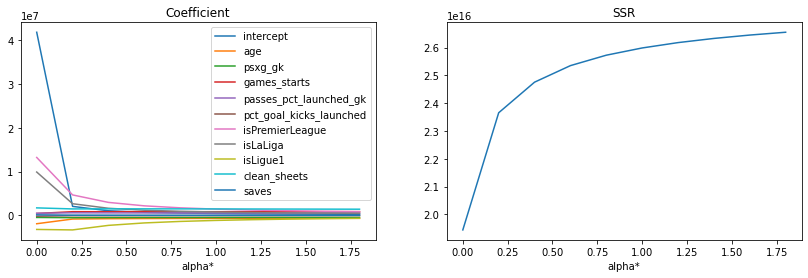

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0] = df.iloc[:, :-1].plot(ax=ax[0])
ax[0].set_title('Coefficient')

ax[1] = df.iloc[:, -1].plot(ax=ax[1])
ax[1].set_title('SSR')
#https://stackoverflow.com/questions/40072870/statistical-summary-table-in-sklearn-linear-model-ridge

In [11]:
#robust regression
modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=trainGK).fit()
r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              modelGKrobust.params, 
                                              modelGK.normalized_cov_params)
finalGK2 = sm.regression.linear_model.OLSResults(modelGK, 
                                              modelGKrobustridge.params, 
                                              modelGK.normalized_cov_params)
print(finalGK1.summary(),finalGK2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     19.35
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           6.34e-22
Time:                        19:00:34   Log-Likelihood:                -2653.7
No. Observations:                 150   AIC:                             5329.
Df Residuals:                     139   BIC:                             5363.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3

In [34]:
#cross validation
#https://stackoverflow.com/questions/41045752/using-statsmodel-estimations-with-scikit-learn-cross-validation-is-it-possible
print(cross_val_score(SMWrapper(sm.OLS), modelGK.exog, modelGK.endog, scoring='neg_mean_squared_error'))

[-1.11193601e+14 -7.74460391e+13 -2.68909226e+14 -7.27724623e+13
 -2.24149999e+14]


In [27]:
trainDEF, testDEF = train_test_split(dataDEF, train_size=0.8)
resultsDEF=smf.ols('value~age+games+xg_net+passes_into_final_thirdm'
                   '+progressive_passesm+gcam+passes_ground+gca_shotsm'
                   '+gca_passes_deadm+pressure_regainsm+pressure_regain_pctm'
                   '+pressures_mid_3rdm+touches_att_pen_aream+carriesm'
                   '+pens_conceded+aerials_won_pct+cards_yellow+isPremierLeague'
                   '+isLaLiga+isSerieA',data=trainDEF).fit()
#resultsDEF.summary()
DEFpredtrain=resultsDEF.predict(trainDEF)
DEFpredtest=resultsDEF.predict(testDEF)
rmsetrainDEF=sm.tools.eval_measures.rmse(trainDEF['value'],DEFpredtrain)
rmsetestDEF=sm.tools.eval_measures.rmse(testDEF['value'],DEFpredtest)
print(rmsetrainDEF,rmsetestDEF)
#errors? xg_xa_per90?
resultsDEF.summary()

nan nan


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     53.51
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.86e-153
Time:                        23:56:50   Log-Likelihood:                -23045.
No. Observations:                1317   AIC:                         4.613e+04
Df Residuals:                    1296   BIC:                         4.624e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.125e+07   2.59e+06      8.219      0.000    1.62e+07    2.63e+07
age                      -9.691e+05   7.59e+04    -12.771      0.000   -1.12e+06    -8.2e+05
games                    -3.688e+05   5.62e+04     -6.565      0.000   -4.79e+05   -2.59e+05
xg_net                    8.001e+05   3.23e+05      2.476      0.013    1.66e+05    1.43e+06
passes_into_final_thirdm -6.527e+06   1.24e+07     -0.524      0.600   -3.09e+07    1.79e+07
progressive_passesm       1.678e+07   1.18e+07      1.424      0.155   -6.34e+06    3.99e+07
gcam                     -3.597e+07   7.04e+07     -0.511      0.609   -1.74e+08    1.02e+08
passes_ground              2.39e+04   1194.437     20.009      0.000    2.16e+04    2.62e+04
gca_shotsm                5.635e+08   7.59e+08      0.742      0.458   -9.25e+08    2.05e+09
gca_passes_deadm          1.811e+09   8.35e+08      2.169      0.030    1.73e+08    3.45e+09
pressure_regainsm         7.402e+05   2.13e+07      0.035      0.972    -4.1e+07    4.25e+07
pressure_regain_pctm      2.928e+05   8.19e+05      0.357      0.721   -1.31e+06     1.9e+06
pressures_mid_3rdm       -1.075e+07   1.08e+07     -0.994      0.321    -3.2e+07    1.05e+07
touches_att_pen_aream     5.107e+07   1.84e+07      2.772      0.006    1.49e+07    8.72e+07
carriesm                  3.832e+06   2.31e+06      1.661      0.097   -6.93e+05    8.36e+06
pens_conceded            -1.227e+06   3.96e+05     -3.100      0.002      -2e+06    -4.5e+05
aerials_won_pct           5.428e+04   2.06e+04      2.637      0.008    1.39e+04    9.47e+04
cards_yellow             -2.604e+05   1.15e+05     -2.263      0.024   -4.86e+05   -3.46e+04
isPremierLeague           6.942e+06   6.84e+05     10.149      0.000     5.6e+06    8.28e+06
isLaLiga                   5.56e+06   8.68e+05      6.403      0.000    3.86e+06    7.26e+06
isSerieA                  7.848e+05   7.44e+05      1.055      0.291   -6.74e+05    2.24e+06
==============================================================================
Omnibus:                      533.857   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2955.209
Skew:                           1.810   Prob(JB):                         0.00
Kurtosis:                       9.383   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
trainMID, testMID = train_test_split(dataMID, train_size=0.8)
resultsMID=smf.ols('value~age+height+minutes_90s+assists+passes_into_final_third+progressive_passes+gca'
                   '+dribbles_vs:minutes+touches_mid_3rd+fouls'
                   '+ball_recoveries+passes_received:minutes+passes_blocked:minutes+npxg_xa_per90'
                   '+passes_into_penalty_area+crosses_into_penalty_area+corner_kicks_in'
                   '+passes_received_pct:minutes+passes_completed+isPremierLeague+isLaLiga',data=trainMID).fit()
MIDpredtrain=resultsMID.predict(trainMID)
MIDpredtest=resultsMID.predict(testMID)
rmsetrainMID=sm.tools.eval_measures.rmse(trainMID['value'],MIDpredtrain)
rmsetestMID=sm.tools.eval_measures.rmse(testMID['value'],MIDpredtest)
print(rmsetrainMID,rmsetestMID)
resultsMID.summary()

11033722.630879171 13479516.368986845


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     40.31
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.28e-109
Time:                        23:56:29   Log-Likelihood:                -14285.
No. Observations:                 810   AIC:                         2.861e+04
Df Residuals:                     788   BIC:                         2.872e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.272e+07   1.34e+07     -0.950      0.342    -3.9e+07    1.36e+07
age                          -1.07e+06   1.08e+05     -9.928      0.000   -1.28e+06   -8.58e+05
height                       2.049e+05   7.26e+04      2.822      0.005    6.24e+04    3.47e+05
minutes_90s                 -4.729e+05   2.44e+05     -1.940      0.053   -9.52e+05    5627.607
assists                     -2.034e+05   3.67e+05     -0.555      0.579   -9.23e+05    5.16e+05
passes_into_final_third      8.883e+04   3.07e+04      2.889      0.004    2.85e+04    1.49e+05
progressive_passes          -1.144e+05    3.4e+04     -3.361      0.001   -1.81e+05   -4.76e+04
gca                          3.179e+05   2.23e+05      1.427      0.154   -1.19e+05    7.55e+05
dribbles_vs:minutes            -6.9342     12.444     -0.557      0.578     -31.361      17.493
touches_mid_3rd              8353.9225   5841.253      1.430      0.153   -3112.334    1.98e+04
fouls                         5.68e+04   4.26e+04      1.335      0.182   -2.67e+04     1.4e+05
ball_recoveries             -7595.2271   1.37e+04     -0.554      0.580   -3.45e+04    1.93e+04
passes_received:minutes         0.7746      1.295      0.598      0.550      -1.767       3.316
passes_blocked:minutes         41.5778     23.528      1.767      0.078      -4.608      87.763
npxg_xa_per90                2.892e+07   4.38e+06      6.610      0.000    2.03e+07    3.75e+07
passes_into_penalty_area     3.239e+05   8.47e+04      3.822      0.000    1.58e+05     4.9e+05
crosses_into_penalty_area   -5.422e+05   1.52e+05     -3.575      0.000    -8.4e+05   -2.44e+05
corner_kicks_in             -2.008e+05   5.05e+04     -3.979      0.000      -3e+05   -1.02e+05
passes_received_pct:minutes   -43.4897     39.125     -1.112      0.267    -120.292      33.312
passes_completed             1.829e+04   3780.513      4.837      0.000    1.09e+04    2.57e+04
isPremierLeague              7.053e+06   1.02e+06      6.909      0.000    5.05e+06    9.06e+06
isLaLiga                      4.96e+06   1.14e+06      4.337      0.000    2.72e+06    7.21e+06
==============================================================================
Omnibus:                      323.778   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1933.982
Skew:                           1.705   Prob(JB):                         0.00
Kurtosis:                       9.758   Cond. No.                     7.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+07. This might indicate that there are
strong multicollinearity or o

In [30]:
trainFWD, testFWD = train_test_split(dataMID, train_size=0.8)
resultsFWD=smf.ols('value~age+goals+assists+shots_total:minutes+passes_pct:minutes+crosses_into_penalty_area:minutes'
                   '+sca_per90'
                   '+errors:minutes+pass_targets:minutes'
                   '+xg_per90+passes_pct+dribbles_vs:minutes+touches_att_pen_area:minutes'
                   '+passes_into_final_third:minutes+passes_ground:minutes'
                   '+gca_dribbles:minutes+crosses+isLaLiga+isPremierLeague',data=dataFWD).fit()

FWDpredtrain=resultsFWD.predict(trainFWD)
FWDpredtest=resultsFWD.predict(testFWD)
rmsetrainFWD=sm.tools.eval_measures.rmse(trainFWD['value'],FWDpredtrain)
rmsetestFWD=sm.tools.eval_measures.rmse(testFWD['value'],FWDpredtest)
print(rmsetrainFWD,rmsetestFWD)
#shots_total?
resultsFWD.summary()

14814351.177228058 13240205.058539666


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     81.53
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          2.28e-187
Time:                        23:57:17   Log-Likelihood:                -18157.
No. Observations:                1013   AIC:                         3.635e+04
Df Residuals:                     993   BIC:                         3.645e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.416e+07   6.94e+06      2.041      0.042    5.42e+05    2.78e+07
age                               -1.475e+06   1.31e+05    -11.278      0.000   -1.73e+06   -1.22e+06
goals                              1.868e+06   2.04e+05      9.138      0.000    1.47e+06    2.27e+06
assists                            7.616e+05   2.75e+05      2.768      0.006    2.22e+05     1.3e+06
shots_total:minutes                 -39.4511     18.503     -2.132      0.033     -75.761      -3.141
passes_pct:minutes                  -75.7878     26.977     -2.809      0.005    -128.726     -22.850
crosses_into_penalty_area:minutes  -366.5706     86.115     -4.257      0.000    -535.560    -197.581
sca_per90                          1.114e+06   5.46e+05      2.039      0.042    4.21e+04    2.19e+06
errors:minutes                    -2020.5992    913.295     -2.212      0.027   -3812.810    -228.389
pass_targets:minutes                 -9.8353      1.902     -5.170      0.000     -13.568      -6.102
xg_per90                           1.319e+07    3.8e+06      3.471      0.001    5.73e+06    2.06e+07
passes_pct                         2.402e+05   8.77e+04      2.737      0.006     6.8e+04    4.12e+05
dribbles_vs:minutes                 -95.9355     19.586     -4.898      0.000    -134.370     -57.501
touches_att_pen_area:minutes         76.7570     11.342      6.768      0.000      54.500      99.014
passes_into_final_third:minutes      75.3762     22.550      3.343      0.001      31.124     119.628
passes_ground:minutes                18.6526      2.787      6.693      0.000      13.184      24.122
gca_dribbles:minutes               -516.6388    232.306     -2.224      0.026    -972.506     -60.772
crosses                            2.013e+05    4.3e+04      4.681      0.000    1.17e+05    2.86e+05
isLaLiga                           6.227e+06   1.23e+06      5.070      0.000    3.82e+06    8.64e+06
isPremierLeague                     1.07e+07   1.18e+06      9.088      0.000    8.39e+06     1.3e+07
==============================================================================
Omnibus:                      531.869   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7318.380
Skew:                           2.079   Prob(JB):                         0.00
Kurtosis:                      15.494   Cond. No.                     3.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [272]:
#Trzeba przeweryfikować zmienne i potem przekopać na scikitlearn
#Testy jakie trzeba przeprowadzić:
#RESET
#Macierz kowariancji
#Chow
#VIF współliniowość
#JB dla reszt
#Goldfeld-Quandt
#Breusch-Pagan
#White (z interakcjami?)
#Durbin-Watson
#Box-Pierce/Ljung-Box
#Pojedyncze testy dla danych zmiennych
#Stacjonarność?
#Endogeniczność?
#Identyfikowalność?
#Ridge regression, lasso regression?
#No i - trzeba będzie jakoś przeprowadzić prognozę, jak?
#Albo podział przez train test split czy jakkolwiek, albo poprzez cross validation
#Podzieli się przy konstrukcji krzywej dla scikitlearn (a może StatsModels?) tak czy owak najpierw zadecydujmy
#jakie zmienne bierzemy

In [358]:
#Chowtest GK
trainGK1=trainGK[trainGK['Season_201819#']==0]
trainGK2=trainGK[trainGK['Season_201819#']==1]
JGK = len(resultsGKridge.params)-1 #number of coefficients
N1GK = trainGK1.shape[0]
N2GK = trainGK2.shape[0]
RSSdGK=resultsGKridge.ssr
resultsGKridge1=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK1).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSbGK=resultsGKridge1.ssr
kGK = len(resultsGKridge1.params)-1
resultsGKridge2=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK2).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSnbGK = resultsGKridge2.ssr
ChowGK=((RSSdGK-(RSSbGK+RSSnbGK))/JGK)/((RSSbGK+RSSnbGK)/(N1GK+N2GK-2*kGK))
pGK=sp.stats.f.cdf(ChowGK, JGK, N1GK+N2GK-2*kGK)
print(ChowGK,pGK,JGK)

2.7174221304059762 0.9953933791971302 10


In [441]:
fit=resultsGKridge.resid
predics=resultsGKridge.fittedvalues
sp.stats.pearsonr(fit, predics)


(8.465450562766819e-16, 0.9999999999999899)

In [498]:
#endogeneity
from statsmodels.sandbox.regression.gmm import IV2SLS
resultsGKridgeendog=IV2SLS(resultsGKridge.model.endog, resultsGKridge.model.exog, instrument=trainGK['minutes']).fit()
resultsGKridgeendog.summary()
resultsGKridgeendog.spec_hausman()

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


(-14067.93173185276, 1.0, 11)

In [450]:
#autocorrelation
sm.stats.stattools.durbin_watson(fit)

1.8200972514337266

In [786]:
#Co trzeba z testów wyprowadzić: macierz kowariancji, VIF, Goldfeld-Quandt
#TESTING GK
sm.regression.linear_model.RegressionResults.cov_params(resultsGK)
#sns.heatmap(sm.regression.linear_model.RegressionResults.cov_params(resultsGK),annot=False,fmt='g')
dataGK_cor = dataGK.corr()
dataGK1=dataGK.drop(['ď»żColumn1','Unnamed: 198','Unnamed: 199','Column1'],axis=1)
dataGK1=dataGK1._get_numeric_data()
calc_vif(dataGK1)

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,age,2.924533e+02
1,birth_year,2.900891e+02
2,value,1.487529e+01
3,height,7.740759e+00
4,games,1.201189e+05
...,...,...
191,isLaLiga,2.055644e+07
192,isLigue1,1.504766e+07
193,isPremierLeague,2.306715e+07
194,isSerieA,2.106627e+07


In [784]:
#testing DEF
sm.regression.linear_model.RegressionResults.cov_params(resultsDEF)
dataDEF_cor=dataDEF.corr()
dataDEF2=dataDEF.drop(['ď»żColumn1','Unnamed: 198','Unnamed: 199','Column1'],axis=1)
dataDEF2=dataDEF2._get_numeric_data()
calc_vif(dataDEF2)

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,age,4.690594e+01
1,birth_year,4.743360e+01
2,value,2.735466e+00
3,height,2.715953e+00
4,games,2.682943e+01
...,...,...
191,isLaLiga,2.934279e+06
192,isLigue1,2.408923e+06
193,isPremierLeague,3.631706e+06
194,isSerieA,2.751254e+06


In [788]:
#testing MID
sm.regression.linear_model.RegressionResults.cov_params(resultsMID)
dataMID_cor=dataMID.corr()
dataMID1=dataMID.drop(['ď»żColumn1','Unnamed: 198','Unnamed: 199','Column1'],axis=1)
dataMID1=dataMID1._get_numeric_data()
dataMID1=dataMID1.dropna()
calc_vif(dataMID1)

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,age,74.378420
1,birth_year,3263.475959
2,value,4.611030
3,height,1699.352912
4,games,69.997602
...,...,...
185,crosses_stopped_gk,NaN
186,crosses_stopped_pct_gk,NaN
187,def_actions_outside_pen_area_gk,NaN
188,def_actions_outside_pen_area_per90_gk,NaN


In [789]:
#testing FWD
sm.regression.linear_model.RegressionResults.cov_params(resultsFWD)
dataFWD_cor=dataFWD.corr()
dataFWD1=dataFWD.drop(['ď»żColumn1','Unnamed: 198','Unnamed: 199','Column1'],axis=1)
dataFWD1=dataFWD1._get_numeric_data()
calc_vif(dataFWD1)

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,age,4.796868e+01
1,birth_year,4.888313e+01
2,value,3.774058e+00
3,height,2.257522e+00
4,games,6.655165e+00
...,...,...
191,isLaLiga,3.230960e+06
192,isLigue1,2.372152e+06
193,isPremierLeague,3.434966e+06
194,isSerieA,2.563199e+06


In [403]:
#Breusch-Pagan

bptestGK=sm.stats.diagnostic.het_breuschpagan(resultsGK.resid, resultsGK.model.exog)
bptestGK
bptestDEF=sm.stats.diagnostic.het_breuschpagan(resultsDEF.resid, resultsDEF.model.exog)
bptestDEF
bptestMID=sm.stats.diagnostic.het_breuschpagan(resultsMID.resid, resultsMID.model.exog)
bptestMID
bptestFWD=sm.stats.diagnostic.het_breuschpagan(resultsFWD.resid, resultsFWD.model.exog)
print(bptestGK,bptestDEF,bptestMID,bptestFWD)

(20.500902103727643, 0.024855532448485363, 2.200498257293397, 0.021064519097582134) (134.39481924512503, 5.811455018690935e-19, 7.697138022459592, 1.1262919591336834e-20) (139.42347788051643, 1.754588989292957e-19, 7.80179420925712, 1.3432036455918024e-21) (205.18831179748238, 3.1550485925975157e-33, 13.275110145395512, 1.598786454965669e-37)


In [452]:
#Goldfeld-Quandt
gqtestGK=sm.stats.diagnostic.het_goldfeldquandt(resultsGK.resid, resultsGK.model.exog)
gqtestGK

(0.7419511398783282, 0.8823952005678805, 'increasing')

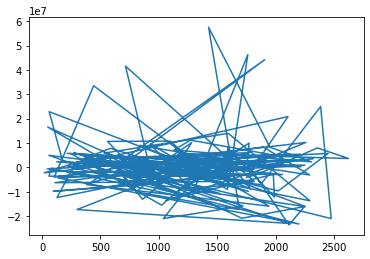

In [463]:
#multicollinearity
np.linalg.cond(resultsGK.model.exog)

<AxesSubplot:>

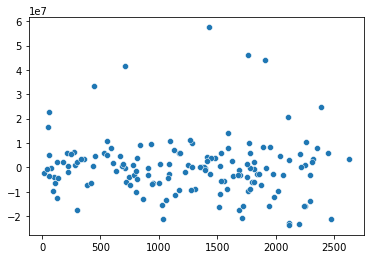

In [466]:
sns.scatterplot(data=resultsGK.resid)

In [ ]:
#Wnioski - mamy heteroskedastyczność, odrzucamy hipotezę testu RESET, mamy silną współliniowość, reszta ok

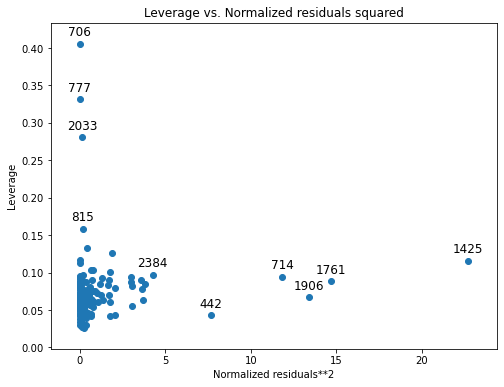

In [464]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(resultsGK, ax = ax)

In [36]:
#SCIKITLEARN
l_reg = LinearRegression(fit_intercept=True)
l_reg

LinearRegression()

In [1019]:
#GK
yGK = dataGK1['value']
XGK = dataGK1[['age','psxg_gk','games_starts','passes_pct_launched_gk','pct_goal_kicks_launched','isPremierLeague','isLaLiga','isLigue1','clean_sheets','saves']]
XGK_train, XGK_test, yGK_train, yGK_test = train_test_split(XGK,yGK,test_size=0.2)
modelGK=l_reg.fit(XGK_train,yGK_train)
predictions=modelGK.predict(XGK_test)
print("Predictions: ", predictions,
     "R^2 value :", l_reg.score(XGK,yGK),
      "Intercept :", l_reg.intercept_,
     "Coefficients :", l_reg.coef_)

Predictions:  [ 20246410.53131051  10043675.98648382  23073154.30036508
  61919978.51303919  17227451.67521381   5688161.26003985
   1530019.53778289   1192502.51770686   6970377.24091029
   7502651.29850175   9665432.27020844  27662338.98051985
  13686472.03701609  13209919.59195507   2665027.17843723
   -936123.98277991   6495246.85240025   5398270.71277565
  32697679.21363984    170126.50014141   4522158.07343771
  16489119.52656518  12656304.43903525  26987460.46558002
  18305516.77017194  16616332.62340657 -17558166.9649501
   9516495.56247494  45578865.64813806   2723912.85959054
  21280073.01751782  15940101.21039207   1774309.61442056
  26521119.4102179    7604525.23516253  24391894.80195861
  28536987.20556359   7928379.4815563 ] R^2 value : 0.5653648928548618 Intercept : 35072102.87350753 Coefficients : [-1664534.39741032  -658419.45335598   549097.23262311   390861.33710578
  -170916.36675435 12316793.89630342  7750606.01413075 -6146133.57103086
  1627986.73237512   136123.5

In [134]:
#DEF

dataDEF1=dataDEF[['value', 'age', 'minutes', 'xg_net', 'passes_into_final_third','progressive_passes', 'gca', 'passes_ground', 'gca_shots',
       'gca_passes_dead', 'pressure_regains', 'pressure_regain_pct',
       'pressures_mid_3rd', 'touches_att_pen_area', 'carries', 'pens_conceded',
       'aerials_won_pct', 'cards_yellow', 'isPremierLeague', 'isLaLiga',
       'isSerieA']]

       
yDEF = pd.DataFrame(dataDEF1['value'])
XDEF = dataDEF1.drop(['value'],axis=1)
XDEF_train, XDEF_test, yDEF_train, yDEF_test = train_test_split(XDEF,yDEF,test_size=0.2)
modelDEF=l_reg.fit(XDEF_train,yDEF_train)
predictionsDEF=modelDEF.predict(XDEF_test)
#print("Predictions: ", predictionsDEF,
     #"R^2 value :", l_reg.score(XDEF,yDEF),
      #"Intercept :", l_reg.intercept_,
     #"Coefficients :", l_reg.coef_)



In [144]:
y_pred_train = modelDEF.predict(XDEF_train)
y_pred_test = modelDEF.predict(XDEF_test)
y_pred_test


array([[-7.38826860e+06],
       [ 2.92396864e+07],
       [ 4.10691317e+06],
       [ 4.60183057e+06],
       [ 1.55913210e+07],
       [ 1.39391243e+07],
       [ 1.21880422e+07],
       [ 1.10153025e+07],
       [ 1.58582033e+06],
       [ 2.59798343e+07],
       [ 4.88396099e+06],
       [ 7.74981768e+06],
       [-8.33093686e+05],
       [ 9.58515033e+06],
       [ 3.94252488e+06],
       [ 3.03034512e+06],
       [ 2.63324996e+06],
       [ 6.11862043e+06],
       [ 6.04403304e+06],
       [ 8.05321213e+06],
       [ 3.09113260e+06],
       [ 8.78948479e+06],
       [ 1.06611139e+06],
       [ 6.39190835e+06],
       [ 8.02781478e+06],
       [ 6.66917054e+05],
       [-1.98119075e+06],
       [-3.77458239e+05],
       [ 1.12728285e+07],
       [ 1.44310540e+07],
       [ 1.62082434e+07],
       [-1.52682260e+06],
       [ 1.86165338e+07],
       [ 6.92115605e+06],
       [ 6.22683672e+06],
       [-2.58433163e+06],
       [ 1.08532775e+07],
       [ 9.58549231e+06],
       [ 1.3

In [1047]:
coefDEF=pd.DataFrame(l_reg.coef_)
coefDEF.index=XDEF.columns
#coefDEF=pd.DataFrame.transpose(coefDEF)
math.sqrt(mean_squared_error(yDEF_test, predictions))

7769285.433663854

In [926]:
#DEFoutcome=[pd.Series(yDEF_test),int(predictions)]
DEFoutcome=pd.concat([pd.Series(predictions),pd.Series(yDEF_test)])

pd.DataFrame(yDEF_test)
predictions

array([ 6710127.1142869 ,  5560639.68859005, 13124518.3669982 ,
        3793001.27938414,  5923914.92423344,  9597289.30426216,
       24901682.67373133, 14575219.59436178, 43925227.59370136,
        8255655.00702572,  1718912.05172634, 17156660.88307142,
       20907193.63458967, 16289202.24825668,  9799958.07443571,
       25790430.51747799,  4446609.91969967, 12760398.99469471,
       12759986.79886246, 27542514.61950731, 31410817.44507885,
        -378272.45754004, 16379338.95762587,  4349936.58330584,
       19783013.11785221, 11555292.97842169,  5367388.26551437,
        -985607.96198225,  5114627.21231413, 14099460.61948061,
       14439044.8191371 , 18616614.13150644,  1777149.36903095,
        3815344.21537352,  2670045.60616541, 19441850.47964811,
       15734508.78416252,  9646384.74713182, 58492758.07461548,
        6190235.71439552,  8006092.35818434, 24629528.6297574 ,
       11934779.59588242, 21014647.88975191,  8836775.13818359,
        2426392.06966925,  4123719.09511

In [1048]:
print(yDEF_test,predictions)

N
1526     2000000
934      7500000
1305     3000000
2249     7000000
1667    50000000
          ...   
2047     9000000
1438     3500000
2097    16000000
1580     4000000
1631     9000000
Name: value, Length: 229, dtype: int64 [-6050732.90785643 11763016.95701025  -660028.8321875   8887135.16575158
 26237316.70723212 25431488.32155178 11068187.09117798 16055817.48128926
  6405538.50493711 23113806.67755921  5266266.29264442 13011762.11332811
   577065.59410157  2553879.15496799 14952570.50610479 13134708.38591888
 20644572.92408624 10906742.26691763 12955860.69794218 20614848.71611471
  1305606.49840896  3471063.56674002  7095397.07368125  1594016.45258211
 16809554.32448542  7835308.13111998  5095805.92582877  8302304.87248913
 24778482.26752854  1654596.54842099 29738592.94791255  9029215.29883062
 15465043.57416365  5238208.15168522 23047974.03567294  4447353.00099356
  8545663.58913773  7994662.55710778  4878038.44101574 -4798977.28212941
  4645473.5734105  17797572.62163917  6229

In [863]:
#MID
yMID = dataMID1['value']
XMID = dataMID1.drop(['value'],axis=1)
XMID_train, XMID_test, yMID_train, yMID_split = train_test_split(XMID,yMID,test_size=0.2)
modelMID=l_reg.fit(XMID_train,yMID_train)
predictions=modelMID.predict(XMID_test)
print("Predictions: ", predictions,
     "R^2 value :", l_reg.score(XMID,yMID),
      "Intercept :", l_reg.intercept_,
     "Coefficients :", l_reg.coef_)

Predictions:  [ -5068956.54096878  14900203.61193299  80583554.82852912
   5973978.35432625    287360.64255226   8711061.26303792
  13900782.94267416  55316348.29693353  15467715.56749117
  10383150.68893528  11648823.61697161  22233812.0836798
  14101977.68602931   3827489.44321179  13353283.91833723
   9951028.23919511  28094357.45473921   8527994.45597899
   5698211.19088972  11955121.46937692   9591775.82022154
  35915980.38719487  36568931.27158833  16476447.45256126
  11578242.73017895  16040517.23795068  15808427.18812168
   8004620.41259027  13454916.92287362  13242319.10195351
   3536880.16158974   3599804.20816708  51056666.19962621
   9858195.08850455  18161537.08807874   3702394.47101247
   3210894.87826848   4093723.34730256  23400815.42177272
  24651513.28035784   8784256.57248855   4709511.86545122
  10626723.48666692  21685052.17917573  22130251.02299929
  27900353.08413768    793769.26749539   4512113.92589056
  10072619.29908943   5979481.98912334  19698171.43316603
 

In [864]:
#FWD
yFWD = dataFWD1['value']
XFWD = dataFWD1.drop(['value'],axis=1)
XFWD_train, XFWD_test, yFWD_train, yFWD_split = train_test_split(XFWD,yFWD,test_size=0.2)
modelFWD=l_reg.fit(XFWD_train,yFWD_train)
predictions=modelFWD.predict(XFWD_test)
print("Predictions: ", predictions,
     "R^2 value :", l_reg.score(XFWD,yFWD),
      "Intercept :", l_reg.intercept_,
     "Coefficients :", l_reg.coef_)

Predictions:  [ 1.48479695e+07  4.21395963e+06  1.05359923e+07  5.41047761e+06
  9.38209345e+06  1.45173429e+07 -6.03719870e+05  1.71000731e+07
  1.73611170e+06 -2.06319657e+07  3.04101349e+07  2.51392255e+07
  5.60278698e+07  1.94733481e+07 -7.99459920e+06  6.07156126e+06
  4.73304361e+07  4.12872597e+07  1.14992316e+07  1.89825712e+07
  3.95588052e+07  1.77810574e+07  1.99130289e+07  6.66284953e+06
 -4.75007641e+06  2.52017193e+07  1.62027617e+07  1.45154302e+07
  2.60273324e+07  4.24607733e+07  1.04985866e+07  3.42154223e+05
 -1.19850246e+06  5.93518987e+06  5.68857762e+06 -9.04540950e+05
  6.67998472e+07  2.32889315e+06  4.03208192e+06  5.26798576e+06
  2.38169183e+07 -1.12613362e+06  1.14116376e+07  1.11190221e+07
  1.59236827e+07  5.93564795e+06  7.53306373e+07  9.73669376e+06
  1.54163342e+07  2.25149289e+07  1.61849278e+07  1.35421575e+07
  2.95575426e+07  3.76019189e+07  3.77179687e+07  1.41447377e+07
  2.35387347e+07  3.45508679e+06  1.57446120e+07  7.62221796e+06
  2.2155426

In [40]:
testy6 = dataDEF['player']
#predictions=pd.Series(predictions)
#EFoutcome=pd.DataFrame(yDEF_test, predictions)
#testy.to_frame().join(yDEF_test)
#DEFoutcome=pd.merge(yDEF_test,predictions,how='left', left_index=True, right_index=False)
#NN=pd.DataFrame(pd.Series(yDEF_test).index.values.astype(int))
testy=pd.Series(yDEF_test.index.values.astype(int))
testy4=yDEF_test.reset_index()

testy1=pd.Series(testy3.index.values.astype(int))
testy2=pd.Series(pd.Series(predictions).index.values.astype(int))
yDEFt=pd.concat([testy,testy4],axis=1)
playerindex=pd.concat([testy1,testy3],axis=1)
predindex=pd.concat([pd.Series(predictions),testy2],axis=1)
testyy=yDEF_test.join(testy6)
testyy

,0,index,value,player
0,145,145,4000000,Patrick van Aanholt
0,145,145,4000000,Patrick van Aanholt
1,1367,1367,10000000,Max Aarons
1,1367,1367,10000000,Ignazio Abate
2,492,492,40000000,Yunis Abdelhamid
...,...,...,...,...
320,1754,1754,1000000,Jordi Calavera
321,2313,2313,3000000,Federico Bonini
321,2313,2313,3000000,Fernando Calero
322,855,855,1000000,Leonardo Bonucci


In [421]:
#Co zrobic
#1. Opracować łączenie predykcji z danymi piłkarzami
#2. Dorobić kolumny które są dzielone przez minuty

dataGK['preds']=predictionsGK
#dataGK3=trainGK[trainGK['Season']=='201920#']
dataGK3.sort_values('preds',ascending=False)[1:10]

#dataDEF['preds']=resultsDEF.fittedvalues
#dataDEF3=dataDEF[dataDEF['Season']=='201920#']

#dataMID['preds']=resultsMID.fittedvalues
#dataMID3=dataMID[dataMID['Season']=='201920#']

#dataFWD['preds']=resultsFWD.fittedvalues
#dataFWD3=dataFWD[dataFWD['Season']=='201920#']

#datapredicted=pd.DataFrame()
#datapredicted=datapredicted.append([dataGK3,dataDEF3,dataMID3,dataFWD3])
#datapredicted.sort_values('preds',ascending=False)[51:100]

<ipython-input-421-3aacc384ad20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGK['preds']=predictionsGK


,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,avg_distance_def_actions_gkm,Season,Column1,goals_m,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,preds
61,61.0,Alisson,br BRA,GK,Liverpool,26,1992,72000000,191.0,Goalkeeper,...,0.006882,201920#,NaN,0.0,0,0,0,1,0,4.724374e+07
2384,2463.0,Marc-AndrÄ‚Â© ter Stegen,de GER,GK,Barcelona,27,1992,72000000,187.0,Goalkeeper,...,0.004660,201920#,NaN,0.0,0,1,0,0,0,4.516128e+07
1761,1818.0,Jan Oblak,si SVN,GK,AtlÄ‚Â©tico Madrid,26,1993,90000000,188.0,Goalkeeper,...,0.004124,201920#,NaN,0.0,0,1,0,0,0,4.217975e+07
561,578.0,Thibaut Courtois,be BEL,GK,Real Madrid,27,1992,48000000,199.0,Goalkeeper,...,0.004837,201920#,NaN,0.0,0,1,0,0,0,4.209970e+07
908,934.0,David de Gea,es ESP,GK,Manchester Utd,28,1990,40000000,192.0,Goalkeeper,...,0.003889,201920#,NaN,0.0,0,0,0,1,0,3.888459e+07
695,716.0,Gianluigi Donnarumma,it ITA,GK,Milan,20,1999,49000000,196.0,Goalkeeper,...,0.004592,201920#,NaN,0.0,0,0,0,0,1,3.337796e+07
1038,1070.0,Dean Henderson,eng ENG,GK,Sheffield Utd,22,1997,14000000,188.0,Goalkeeper,...,0.004259,201920#,NaN,0.0,0,0,0,1,0,3.329192e+07
125,125.0,Kepa Arrizabalaga,es ESP,GK,Chelsea,24,1994,36000000,186.0,Goalkeeper,...,0.005354,201920#,NaN,0.0,0,0,0,1,0,3.226106e+07
2199,2271.0,Kasper Schmeichel,dk DEN,GK,Leicester City,32,1986,9000000,189.0,Goalkeeper,...,0.004591,201920#,NaN,0.0,0,0,0,1,0,3.122726e+07


In [407]:
trainGK

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201819#,Season_201920#,goals_m,preds
1096,NaN,Bernd Leno,de GER,GK,Arsenal,26,1992,30000000,190.0,Goalkeeper,...,1389.0,0,0,0,1,0,1,0,0.0,17.019188
943,969.0,Pierluigi Gollini,it ITA,GK,Atalanta,24,1995,13000000,194.0,Goalkeeper,...,NaN,0,0,0,0,1,0,1,0.0,17.586142
1942,2006.0,Nick Pope,eng ENG,GK,Burnley,27,1992,12000000,191.0,Goalkeeper,...,NaN,0,0,0,1,0,0,1,0.0,17.565217
1590,NaN,IonuČ› Radu,ro ROU,GK,Genoa,21,1997,15000000,188.0,Goalkeeper,...,2014.0,0,0,0,0,1,1,0,0.0,17.203952
1170,1210.0,Jesse Joronen,fi FIN,GK,Brescia,26,1993,4000000,197.0,Goalkeeper,...,NaN,0,0,0,0,1,0,1,0.0,16.512651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,NaN,Sergio Rico,es ESP,GK,Fulham,24,1993,12000000,195.0,Goalkeeper,...,2067.0,0,0,0,1,0,1,0,0.0,16.702556
1118,NaN,Hugo Lloris,fr FRA,GK,Tottenham,31,1986,25000000,188.0,Goalkeeper,...,1412.0,0,0,0,1,0,1,0,0.0,17.116526
58,NaN,Sergio Ă�lvarez,es ESP,GK,Celta Vigo,31,1986,2000000,179.0,Goalkeeper,...,70.0,0,1,0,0,0,1,0,0.0,15.831118
1813,1871.0,Fernando Pacheco,es ESP,GK,AlavÄ‚Â©s,27,1992,14000000,186.0,Goalkeeper,...,NaN,0,1,0,0,0,0,1,0.0,16.743865
